# DataJoint Workflow Calcium Imaging Demo

This notebook demonstrates using DataJoint's open-source Elements packages to build a workflow for
calcium imaging. For a detailed tutorial, please see our tutorial notebooks.

![Raw Scans](../images/rawscans.gif) ![Motion Corrected
Scans](../images/motioncorrectedscans.gif) 

![Cell Segmentation](../images/cellsegmentation.png) ![Calcium
Events](../images/calciumtraces.png) 

Left to right: Raw scans, Motion corrected scans, Cell segmentation, Calcium events

We'll begin by importing the dependencies, then viewing all the tables in the workflow.
After this, we will insert, populate, and analyze calcium imaging data

In [3]:
# Import Statements

import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

import datajoint as dj
import datetime
import matplotlib.pyplot as plt
import numpy as np
from workflow_calcium_imaging.pipeline import subject, session, scan, imaging
from element_calcium_imaging.plotting.widget import main

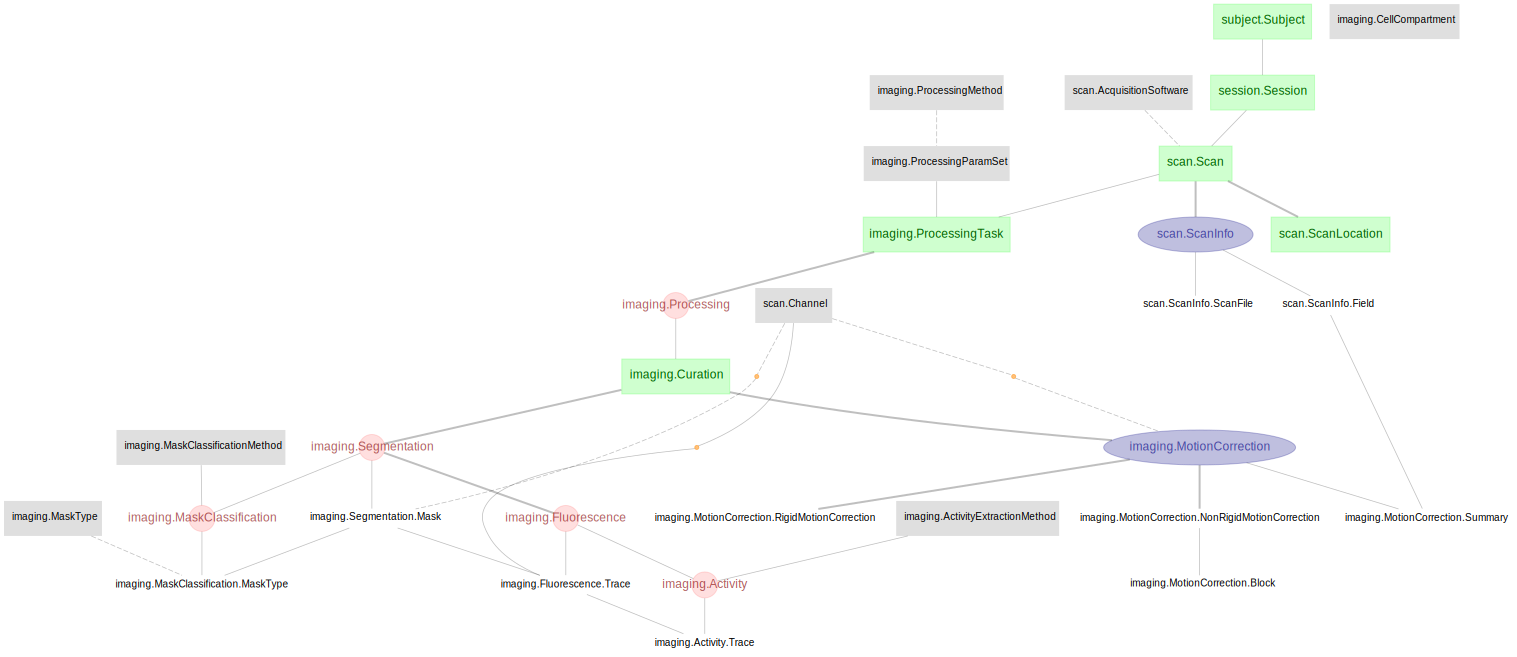

In [4]:
# Run this cell to view a diagram of the tables that we will use in this demo

(
    dj.Diagram(subject.Subject) + dj.Diagram(session.Session) + dj.Diagram(scan) + dj.Diagram(imaging)
)

### Inserting entries on manual tables calls on the `insert()` function within DataJoint

For example, to insert data about a subject: 
```
subject.Subject.insert1(
    dict(
        subject='subject1',
        subject_birth_date='2023-01-01',
        sex='U',
    ),
    skip_duplicates=True
)
```

### Automatically process sessions with `Populate()`


Once data is inserted into manual tables, the `.populate()` function in DataJoint
triggers automatic processing and ingestion routines. 

For example, to trigger suite2p processing via the `Processing` table:
```
imaging.Processing.populate()
```

### Visualize Ingested Data

In [2]:
main(imaging)

For a much more in-depth tutorial, be sure to check out our `full_demo.ipynb`.